In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,make_scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from IPython.display import display
import ipywidgets as widgets

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
ls data

WA_Fn-UseC_-Telco-Customer-Churn.csv


# 1. Data

In [4]:

telcom = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telcom.shape

(7043, 21)

In [6]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

dropdown_year = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(telcom.tenure))

def dropdown_year_eventhandler(change):
    if (change.new == ALL):
        display(telcom)
    else:
        display(telcom[telcom.tenure == change.new])
        
dropdown_year.observe(dropdown_year_eventhandler, names='value')
print("Tenure :")
display(dropdown_year)

Tenure :


Dropdown(options=('ALL', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,…

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
73,8028-PNXHQ,Male,0,Yes,Yes,62,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.25,1424.6,No
153,9073-ZZIAY,Male,0,Yes,Yes,62,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,86.10,5215.25,No
621,0516-UXRMT,Female,0,No,No,62,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,One year,Yes,Electronic check,92.05,5755.8,No
799,3009-JWMPU,Male,0,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,96.75,6125.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6776,6120-RJKLU,Female,1,Yes,No,62,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.95,4819.75,No
6876,6341-AEVKX,Female,0,Yes,No,62,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,104.30,6613.65,No
6897,2363-BJLSL,Male,0,No,No,62,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),80.40,4981.15,No
6976,5130-YPIRV,Female,0,Yes,No,62,Yes,No,DSL,Yes,...,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),72.00,4284.2,No


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# 2. Data Pipeline

In [7]:
#Data Manipulation

#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

<AxesSubplot:>

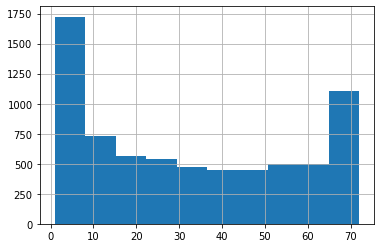

In [9]:
telcom["tenure"].hist()

In [10]:
#Tenure to categorical column

def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom), axis = 1)

In [11]:
#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

In [14]:
churn.shape

(1869, 22)

In [15]:
not_churn.shape

(5163, 22)

In [22]:
#Separating catagorical and numerical columns

Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [18]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [20]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
bin_cols 

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [24]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [25]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,1,1,0,1,1,...,0,1,0,1,0,0,0,-0.343137,0.664868,-0.129180
7028,2234-XADUH,0,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,1,1.612573,1.276493,2.241056
7029,4801-JZAZL,0,0,1,1,0,1,0,0,0,...,1,0,1,0,0,0,0,-0.872808,-1.170004,-0.854514
7030,8361-LTMKD,1,1,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,-1.158016,0.319168,-0.872095


In [28]:
# smote, not necessary

from imblearn.over_sampling import SMOTE

cols    = [i for i in telcom.columns if i not in Id_col+target_col]

smote_X = telcom[cols]
smote_Y = telcom[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_resample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

In [29]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((5274, 33), (5274, 1), (1758, 33), (1758, 1))

In [32]:
train_Y.value_counts()

Churn
0        3895
1        1379
dtype: int64

In [33]:
test_Y.value_counts()

Churn
0        1268
1         490
dtype: int64

# 3. Common function for model prediction

In [37]:

def telecom_churn_prediction(algorithm,training_x,testing_x,training_y,testing_y) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    model_accuracy = accuracy_score(testing_y,predictions)
    print ("Accuracy   Score : ",model_accuracy,"\n")
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    model_f1_score = f1_score(testing_y,predictions) 
    print ("F1 score: ",model_f1_score,"\n")
           
    return model_accuracy,model_roc_auc,model_f1_score;

In [39]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, 
                            fit_intercept=True,intercept_scaling=1, 
                            max_iter=6, multi_class='ovr', n_jobs=1,
                            penalty='l1', random_state=None, solver='liblinear', 
                            tol=0.0001,verbose=0, warm_start=False)

model_accuracy,model_roc_auc,model_f1_score=telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y)

Accuracy   Score :  0.7992036405005688 

Area under curve :  0.7124219403849867 

F1 score:  0.5890570430733412 



In [40]:
xgc = XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, 
                    gamma=0, learning_rate=0.9, max_delta_step=0,max_depth = 7, min_child_weight=1, 
                    missing=None, n_estimators=100,n_jobs=1, nthread=None, 
                    objective='binary:logistic', random_state=0,reg_alpha=0, reg_lambda=1, 
                    scale_pos_weight=1, seed=None,silent=True, subsample=1)

model_accuracy,model_roc_auc, model_f1_score=telecom_churn_prediction(xgc,os_smote_X,test_X,os_smote_Y,test_Y)

[11:35:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:35:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBoostError: [11:35:10] /Users/travis/build/dmlc/xgboost/src/c_api/c_api_utils.h:161: Invalid missing value: null
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000016b5ccde4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x000000016b5bf86c xgboost::GetMissing(xgboost::Json const&) + 268
  [bt] (2) 3   libxgboost.dylib                    0x000000016b5c6793 void InplacePredictImpl<xgboost::data::ArrayAdapter>(std::__1::shared_ptr<xgboost::data::ArrayAdapter>, std::__1::shared_ptr<xgboost::DMatrix>, char const*, xgboost::Learner*, unsigned long, unsigned long, unsigned long long const**, unsigned long long*, float const**) + 531
  [bt] (3) 4   libxgboost.dylib                    0x000000016b5c6253 XGBoosterPredictFromDense + 339
  [bt] (4) 5   libffi.dylib                        0x00007fff2dadc8f5 ffi_call_unix64 + 85



In [41]:
gnb = GaussianNB(priors=None)
model_accuracy,model_roc_auc, model_f1_score=telecom_churn_prediction(gnb,os_smote_X,test_X,os_smote_Y,test_Y)

Accuracy   Score :  0.7480091012514221 

Area under curve :  0.7645850769329814 

F1 score:  0.6395443449959317 



In [42]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=8, p=2,weights='uniform')
model_accuracy,model_roc_auc, model_f1_score=telecom_churn_prediction(knn,os_smote_X,test_X,os_smote_Y,test_Y)

Accuracy   Score :  0.7445961319681457 

Area under curve :  0.7309148264984228 

F1 score:  0.6044052863436123 

